# Thresholding


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# simple Thresh

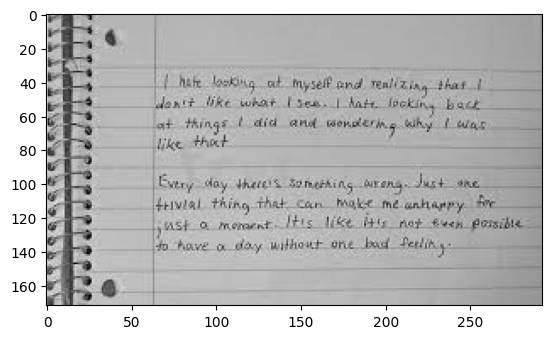

In [2]:
image = cv2.imread("./nb.jpg",0)
plt.imshow(image, cmap='gray')

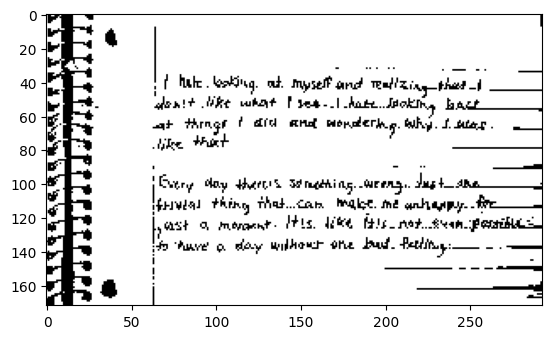

In [3]:
retval, binary = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

plt.Figure(figsize=(12,7))
plt.imshow(binary, cmap='gray')

# adaptive Thresholding


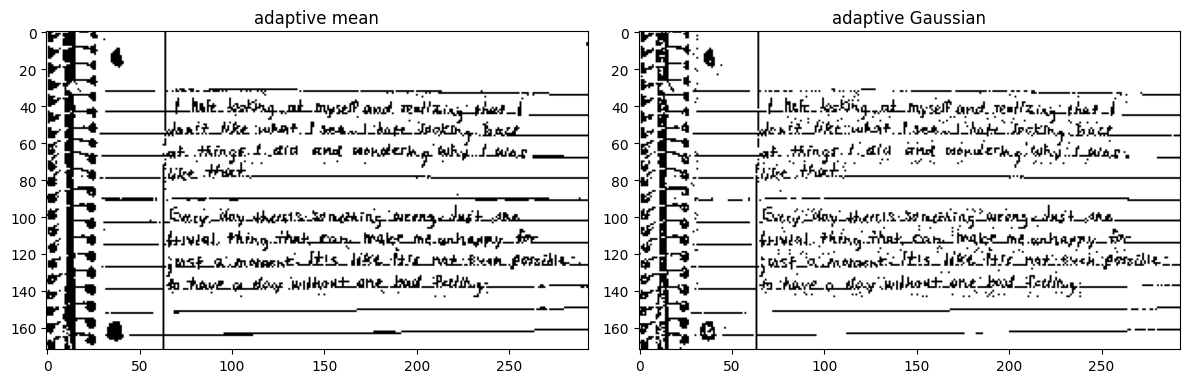

In [4]:
adaptive_m = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10)
adaptive_g = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10)


plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("adaptive mean")
plt.imshow(adaptive_m, cmap='gray')
plt.subplot(1,2,2)
plt.title("adaptive Gaussian")
plt.imshow(adaptive_g, cmap='gray')

plt.tight_layout()
plt.show()


# K means Clustering Algo for Image segmentation

In [5]:
image = cv2.imread("./shapes.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values= image.reshape((-1,3))
pixel_values = np.float32(pixel_values)
print(pixel_values)

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 ...
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


In [6]:
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TermCriteria_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [7]:
print(labels.shape)

print(centers)

(640000, 1)
[[ 17.168013 149.5205   179.14777 ]
 [255.24576  255.42085  255.34338 ]
 [190.97383   85.884674  87.51112 ]]


Text(0.5, 1.0, 'Segmented image')

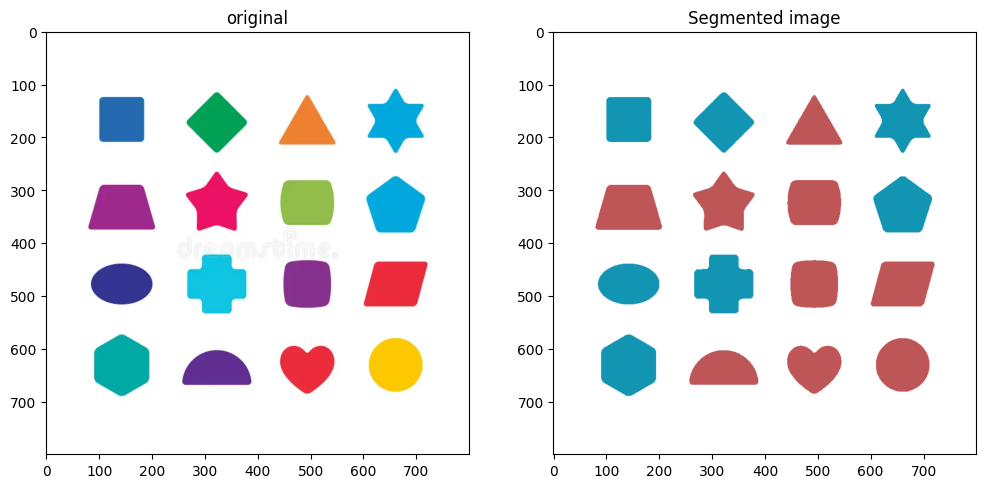

In [8]:
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]

segmented_image = segmented_image.reshape(image.shape)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("original")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented image")